In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           398 non-null    object 
 2   Age              398 non-null    float64
 3   EstimatedSalary  398 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,398.000000,398.000000,400.000000
mean,1.569154e+07,37.625628,69492.462312,0.357500
std,7.165832e+04,10.496157,33934.351995,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.250000,43000.000000,0.000000
50%,1.569434e+07,37.000000,69500.000000,0.000000
75%,1.575036e+07,46.000000,87000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.shape

(400, 5)

In [6]:
df['Gender'].value_counts()

Female    202
Male      196
Name: Gender, dtype: int64

In [7]:
df.groupby(['Gender', 'Purchased']).size()

Gender  Purchased
Female  0            125
        1             77
Male    0            130
        1             66
dtype: int64

In [8]:
df.isnull().sum()

User ID            0
Gender             2
Age                2
EstimatedSalary    2
Purchased          0
dtype: int64

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [10]:
df.isnull().sum()

User ID            0
Gender             2
Age                0
EstimatedSalary    2
Purchased          0
dtype: int64

In [11]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [12]:
df['EstimatedSalary'].mean()

69492.46231155779

In [13]:
df['EstimatedSalary'].median()

69500.0

In [14]:
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean())

In [15]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [16]:
x=df.drop(columns=['Purchased'])
y=df['Purchased']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=55)

In [18]:
labelencoder = LabelEncoder()

In [19]:
x_train['Gender'] = labelencoder.fit_transform(x_train['Gender'])
x_test['Gender'] = labelencoder.transform(x_test['Gender'])

In [20]:
x_test

,User ID,Gender,Age,EstimatedSalary
26,15792818,1,49.0,28000.0
258,15569641,0,58.0,95000.0
128,15722758,1,30.0,17000.0
126,15610801,1,42.0,65000.0
6,15598044,0,27.0,84000.0
...,...,...,...,...
4,15804002,1,19.0,76000.0
119,15701962,1,41.0,59000.0
41,15591915,0,33.0,51000.0
332,15769902,1,42.0,65000.0


In [21]:
scaler = StandardScaler()

In [22]:
scaler

StandardScaler()

In [23]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
x_train

array([[-0.44652513, -0.95716648, -1.76782085, -1.262942  ],
       [-0.2218551 , -0.95716648,  0.31070903, -0.53789378],
       [-0.19290098, -0.95716648, -1.67334222, -0.97292271],
       ...,
       [-0.3272481 ,  1.04475034,  0.97205945, -1.0599285 ],
       [ 0.44270824, -0.95716648, -0.16168412, -0.18987064],
       [-1.23826334,  1.04475034,  0.2162304 , -0.6539015 ]])

In [25]:
clf = KNeighborsClassifier()

In [26]:
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})

,y_test,y_pred
26,1,1
258,1,1
128,0,0
126,0,0
6,0,0
...,...,...
4,0,0
119,0,0
41,0,0
332,0,0


In [29]:
accuracy_score(y_test,y_pred)

0.95

In [30]:
confusion_matrix(y_test,y_pred)

array([[53,  3],
       [ 1, 23]], dtype=int64)

In [31]:
print('Classification Report: ',classification_report(y_test,y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.98      0.95      0.96        56
           1       0.88      0.96      0.92        24

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



<Axes: >

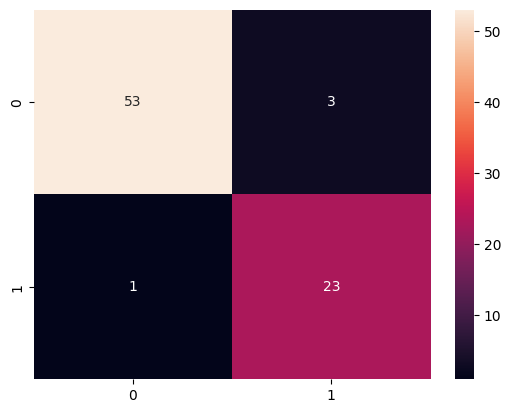

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)